# Using Security Cameras to count things

Cars are relatively easy to count, as they appear consistently in the same places in the image (unless they've
run off the road).

This notebook uses some images from the Anzac Bridge and counts the number of cars if finds there.

In [1]:
%matplotlib inline
import matplotlib
import numpy
import skimage.io
import skimage.color
import skimage.filters
import skimage.morphology
import skimage.exposure

def show(im): matplotlib.pyplot.imshow(im, cmap=matplotlib.pyplot.cm.gray)
def show_as_grey(im): show(skimage.color.rgb2grey(im))
def show_colour(im): matplotlib.pyplot.imshow(im)
    
def average_image(images):
    grayscales = [skimage.color.rgb2grey(im) for im in images]
    return numpy.median(numpy.array(grayscales), axis=0)

def middle_image_differences(images):
    return skimage.color.rgb2grey(images[len(images)/2]) - average_image(images)

def extremity_transform(im):
    dark_negatron = numpy.power(numpy.abs(im), 0.5)
    negatron = skimage.exposure.rescale_intensity(dark_negatron, 'image', (0.0, 1.0))
    return negatron

def simplify(im):
    return skimage.morphology.remove_small_objects(im, 50)
    #return skimage.filters.rank.median(im, skimage.morphology.disk(3))

def label(im):
    label_array = skimage.morphology.label(im)
    print max(numpy.unique(label_array)), "objects identified"
    return label_array

def show_overlay(original_image, desmudged):
    copy = original_image.copy()
    copy[desmudged == False] = (0,0,0)
    matplotlib.pyplot.imshow(copy)


In [2]:
minutes = [ '16', '17', '18', '19', '20']
anzac_bridge_images = [skimage.io.imread('AnzacBridge/2016-12-09/13-' + m + '.jpg') for m in minutes ]
middle_image = anzac_bridge_images[2]

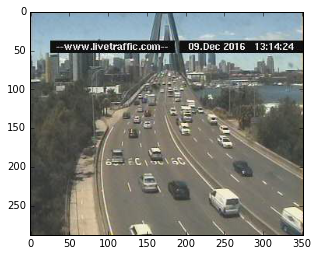

In [3]:
show_colour(anzac_bridge_images[0])

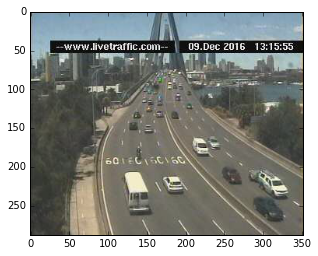

In [4]:
show_colour(anzac_bridge_images[1])

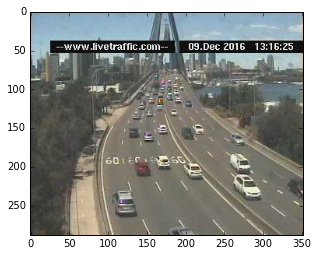

In [5]:
show_colour(middle_image)

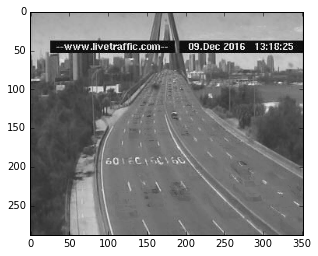

In [6]:
background = average_image(anzac_bridge_images)
show(background)

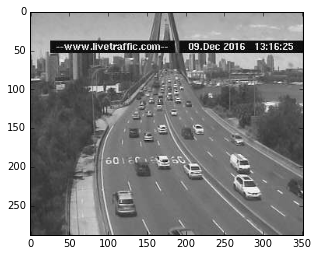

In [7]:
show_as_grey(middle_image)

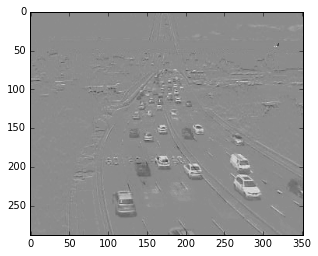

In [8]:
difference_image = middle_image_differences(anzac_bridge_images)
show(difference_image)

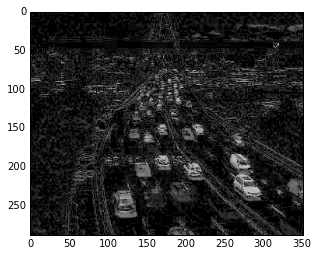

In [9]:
extremes = extremity_transform(difference_image)
show(extremes)

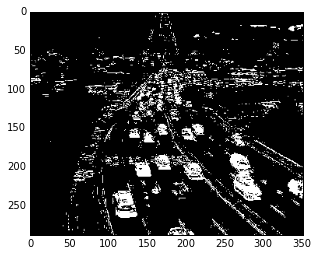

In [10]:
thresholded = extremes > 0.28
show(thresholded)

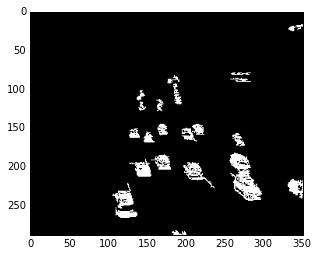

In [11]:
simple = simplify(thresholded)
show(simple)

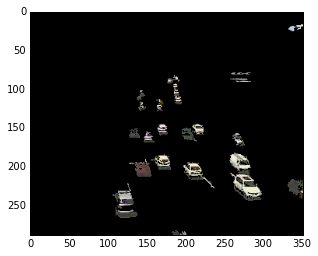

In [12]:
show_overlay(middle_image, simple)

21 objects identified


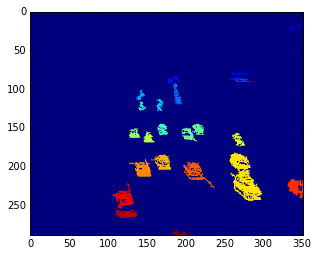

In [13]:
l = label(simple)
show_colour(l)